<a href="https://colab.research.google.com/github/00sakshi00/Face-Mask-Detection/blob/main/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing** **the** **Dependencies**

In [ ]:
import os #access files
import numpy as np #convert imgaes to arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1460.jpg', 'with_mask_1212.jpg', 'with_mask_3112.jpg', 'with_mask_3526.jpg', 'with_mask_498.jpg']
['with_mask_1024.jpg', 'with_mask_1173.jpg', 'with_mask_516.jpg', 'with_mask_1075.jpg', 'with_mask_1540.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3637.jpg', 'without_mask_1213.jpg', 'without_mask_2409.jpg', 'without_mask_2869.jpg', 'without_mask_755.jpg']
['without_mask_1164.jpg', 'without_mask_690.jpg', 'without_mask_1811.jpg', 'without_mask_1939.jpg', 'without_mask_1871.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))


Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


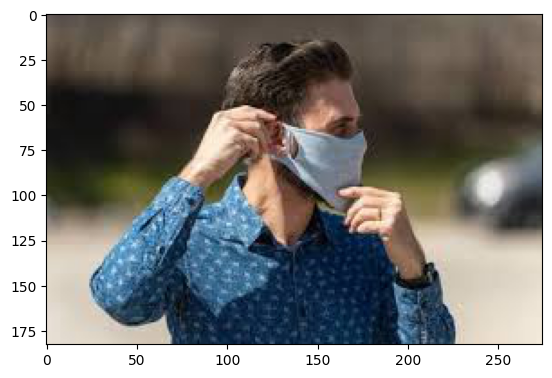

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

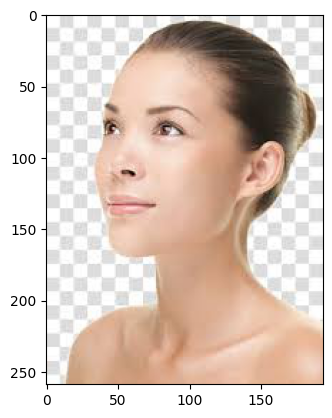

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**



*   Resize the Images
*   Convert the Imgaes to numpy arrays

In [ ]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/' # /added in path

data=[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image= image.resize((128,128)) #make all images of same size
  image= image.convert('RGB') #some images may be gray scale
  image= np.array(image)
  data.append(image) 



without_mask_path = '/content/data/without_mask/' 

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image) 

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)
len(data)

7553

In [ ]:
data[0]

array([[[ 93,  93,  93],
        [ 95,  95,  95],
        [100, 100, 100],
        ...,
        [ 81,  81,  81],
        [ 78,  78,  78],
        [ 76,  76,  76]],

       [[101, 101, 101],
        [103, 103, 103],
        [108, 108, 108],
        ...,
        [ 92,  92,  92],
        [ 89,  89,  89],
        [ 87,  87,  87]],

       [[112, 112, 112],
        [115, 115, 115],
        [120, 120, 120],
        ...,
        [ 99,  99,  99],
        [ 96,  96,  96],
        [ 94,  94,  94]],

       ...,

       [[ 56,  56,  56],
        [ 58,  58,  58],
        [ 32,  32,  32],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9]],

       [[ 59,  59,  59],
        [ 49,  49,  49],
        [ 19,  19,  19],
        ...,
        [  9,   9,   9],
        [  9,   9,   9],
        [  9,   9,   9]],

       [[ 65,  65,  65],
        [ 31,  31,  31],
        [ 20,  20,  20],
        ...,
        [ 15,  15,  15],
        [  8,   8,   8],
        [  8,   8,   8]]

In [ ]:
type(data[0])   # ndarray => n dimensional array

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 77,  86,  95],
        [ 76,  85,  94],
        [ 77,  85,  95],
        ...,
        [ 55,  55,  68],
        [ 55,  55,  67],
        [ 56,  56,  68]],

       [[ 76,  86,  96],
        [ 73,  82,  92],
        [ 72,  80,  90],
        ...,
        [ 55,  55,  67],
        [ 58,  58,  70],
        [ 59,  59,  71]],

       [[ 74,  84,  94],
        [ 72,  81,  92],
        [ 73,  81,  92],
        ...,
        [ 56,  56,  68],
        [ 59,  59,  71],
        [ 59,  59,  71]],

       ...,

       [[235, 244, 223],
        [235, 244, 223],
        [234, 242, 223],
        ...,
        [207, 210, 193],
        [207, 210, 193],
        [208, 212, 195]],

       [[237, 244, 223],
        [236, 242, 221],
        [239, 244, 224],
        ...,
        [206, 210, 193],
        [210, 214, 197],
        [211, 215, 198]],

       [[238, 241, 222],
        [241, 244, 225],
        [240, 243, 224],
        ...,
        [207, 211, 194],
        [212, 216, 199],
        [206, 210, 193]]

In [ ]:
X_train_scaled[0]

array([[[0.30196078, 0.3372549 , 0.37254902],
        [0.29803922, 0.33333333, 0.36862745],
        [0.30196078, 0.33333333, 0.37254902],
        ...,
        [0.21568627, 0.21568627, 0.26666667],
        [0.21568627, 0.21568627, 0.2627451 ],
        [0.21960784, 0.21960784, 0.26666667]],

       [[0.29803922, 0.3372549 , 0.37647059],
        [0.28627451, 0.32156863, 0.36078431],
        [0.28235294, 0.31372549, 0.35294118],
        ...,
        [0.21568627, 0.21568627, 0.2627451 ],
        [0.22745098, 0.22745098, 0.2745098 ],
        [0.23137255, 0.23137255, 0.27843137]],

       [[0.29019608, 0.32941176, 0.36862745],
        [0.28235294, 0.31764706, 0.36078431],
        [0.28627451, 0.31764706, 0.36078431],
        ...,
        [0.21960784, 0.21960784, 0.26666667],
        [0.23137255, 0.23137255, 0.27843137],
        [0.23137255, 0.23137255, 0.27843137]],

       ...,

       [[0.92156863, 0.95686275, 0.8745098 ],
        [0.92156863, 0.95686275, 0.8745098 ],
        [0.91764706, 0

**Building Convolution Neural Network**

In [ ]:
import tensorflow as tf         #build neural network developed by google
from tensorflow import keras    #developed by facebook

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) # 2D data to single dimensional

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))  # avoid overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid')) # sigmoid for binary classification

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 18s 22ms/step - loss: 0.4860 - acc: 0.7635 - val_loss: 0.3216 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2941 - acc: 0.8871 - val_loss: 0.2498 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2347 - acc: 0.9106 - val_loss: 0.2435 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2009 - acc: 0.9207 - val_loss: 0.2434 - val_acc: 0.8860
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1759 - acc: 0.9347 - val_loss: 0.2740 - val_acc: 0.8826


**Evalution**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2313 - acc: 0.9153
Test Accuracy = 0.9152879118919373


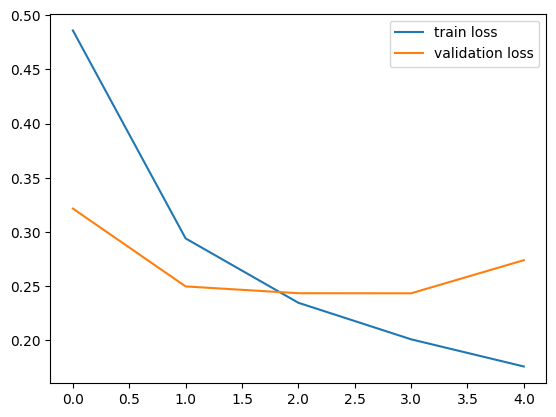

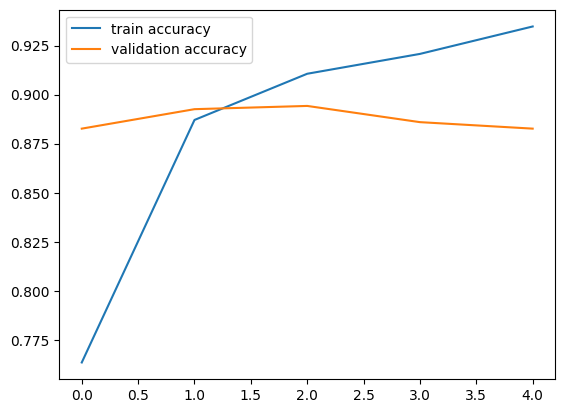

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with mask.jpeg


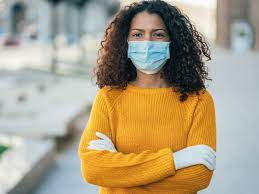

1/1 [==============================] - 0s 22ms/step
[[0.00254596 0.99998665]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)   # cv2=> to display using colab

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3]) #for only one image

input_prediction = model.predict(input_image_reshaped)

print(input_prediction) # gives probability

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')